In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Youtube-Spam-Dataset.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [7]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [9]:
df = df.drop(["COMMENT_ID", "AUTHOR", "DATE", "VIDEO_NAME"], axis=1)


In [11]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [13]:
X = df['CONTENT']
y = df['CLASS']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
print(X)

0       Huh, anyway check out this you[tube] channel: ...
1       Hey guys check out my new channel and our firs...
2                  just for test I have to say murdev.com
3        me shaking my sexy ass on my channel enjoy ^_^ ﻿
4                 watch?v=vtaRGgvGtWQ   Check this out .﻿
                              ...                        
1951    I love this song because we sing it at Camp al...
1952    I love this song for two reasons: 1.it is abou...
1953                                                  wow
1954                              Shakira u are so wiredo
1955                           Shakira is the best dancer
Name: CONTENT, Length: 1956, dtype: object


In [19]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1951    0
1952    0
1953    0
1954    0
1955    0
Name: CLASS, Length: 1956, dtype: int64


In [21]:
tfidf = TfidfVectorizer(stop_words='english')
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [23]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
y_pred = svm.predict(X_test)


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9566326530612245


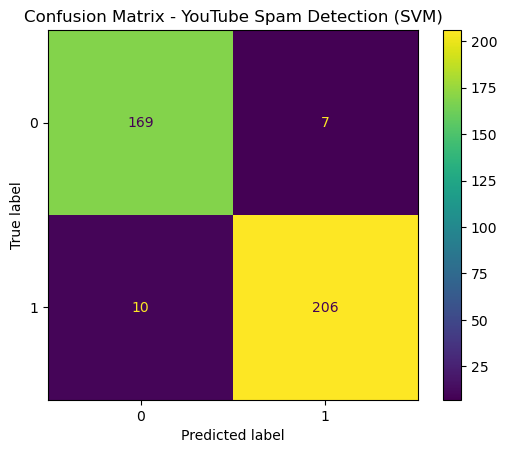

In [29]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - YouTube Spam Detection (SVM)")
plt.show()

In [31]:
joblib.dump(svm, "svm_spam_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [33]:
print("Model & Vectorizer Saved Successfully!")


Model & Vectorizer Saved Successfully!


In [35]:
import joblib

# Load saved
model = joblib.load("svm_spam_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")

# Input comment text
text = input("Enter YouTube Comment: ")

# Transform and Predict
text_tfidf = tfidf.transform([text])
prediction = model.predict(text_tfidf)

print("Prediction:", prediction[0])  # spam or ham


Enter YouTube Comment:  hi


Prediction: 0
